<a href="https://colab.research.google.com/github/Christian-F-Badillo/NLP_challenge_MeIA/blob/main/Copy_of_Copy_of_NLP_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Challenge

Proyect for the NLP Challenge by [MeIA](https://www.taller-tic.redmacro.unam.mx/MeIA/)

Github Repository: [https://github.com/Christian-F-Badillo/NLP_challenge_MeIA](https://github.com/Christian-F-Badillo/NLP_challenge_MeIA)

> Authors: [Christian Badillo](mailto:cris.badillo1408@gmail.com),

## Preprocessing

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Data

In [2]:
# Load Data from Github in CSV UTF-8 format
url = "https://raw.githubusercontent.com/Christian-F-Badillo/NLP_challenge_MeIA/main/MeIA_Rest_Mex_Sentiment_Analysis_2023_Train.csv"
data = pd.read_csv(url)

In [3]:
# First fiftenn observations.
data.head(15)

,Review,Class,Unnamed: 2,Unnamed: 3
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0,NaN,NaN
1,"yo estaba tan emocionada de este viaje, pero t...",1.0,NaN,NaN
2,Este hotel es un engaño. De cuatro estrellas n...,1.0,NaN,NaN
3,La ducha se inundo completamente a los 5 min ...,1.0,NaN,NaN
4,Decidimos alquilar un taxi por un día para ir ...,1.0,NaN,NaN
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0,NaN,NaN
6,"No me he alojado en este hotel, pero se recome...",1.0,NaN,NaN
7,"Muy mala atencion, entramos a beber algo y as...",1.0,NaN,NaN
8,"Así que volví como he dicho. El hotel, que for...",1.0,NaN,NaN
9,"La ciudad es bonita, pero la gente deja muchis...",1.0,NaN,NaN


In [4]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      17500 non-null  object 
 1   Class       17500 non-null  float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 679.1+ KB


### Data Cleaning

In [5]:
# Drop Empty Columns
data.drop(["Unnamed: 2", "Unnamed: 3"], inplace = True, axis = 1)
data.head()

,Review,Class
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  17500 non-null  object 
 1   Class   17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 339.6+ KB


In [7]:
# Rename Columns
data.rename(columns = {'Class':'target', "Review": "review"}, inplace = True)

# Find null indices to drop.
nan_values = np.where(data.target.isnull())

In [8]:
# Drop Null Rows.
data.drop(nan_values[0], inplace = True, axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  17500 non-null  object 
 1   target  17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.6+ KB


In [9]:
# Check for more Null values.
data.isnull().sum()

review    0
target    0
dtype: int64

In [10]:
# Show the first fifteen observations.
data.head(15)

,review,target
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0
6,"No me he alojado en este hotel, pero se recome...",1.0
7,"Muy mala atencion, entramos a beber algo y as...",1.0
8,"Así que volví como he dicho. El hotel, que for...",1.0
9,"La ciudad es bonita, pero la gente deja muchis...",1.0


### Visualization of Target's Distribution

In [11]:
# Freq of Classes.
heights = data.target.value_counts().sort_index(ascending=True)
print(heights)

1.0    1750
2.0    2625
3.0    3500
4.0    4375
5.0    5250
Name: target, dtype: int64


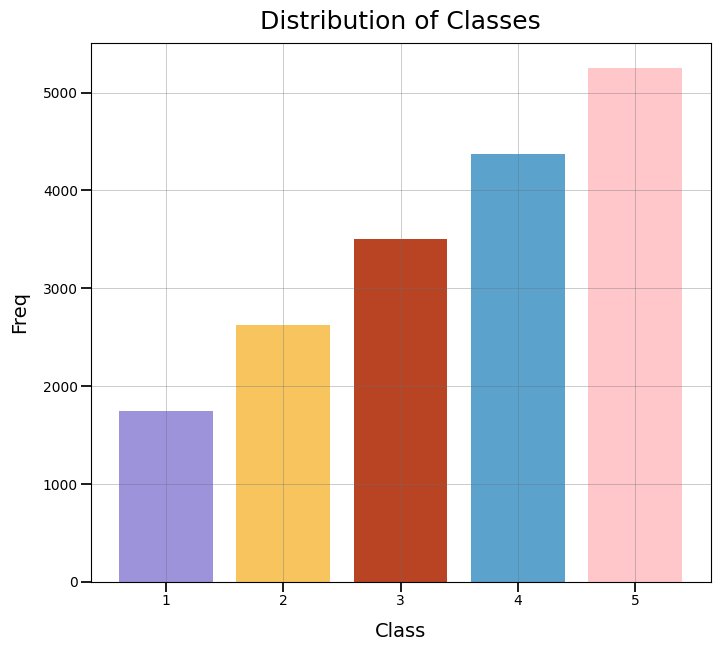

In [12]:
# Barplot of Class Distribution.

# Bar Color
colors = ["#9C93DB", "#F7C45E", "#B84423", "#5BA2CC", "#FFC7C9"]

fig, ax = plt.subplots(figsize = (8, 7))

ax.bar(x = data.target.unique(), height = heights, color = colors)

# Custom
ax.tick_params(direction='out', length = 7, width = 1.25 , colors='black',
                grid_color='black', grid_alpha= 0.5, pad = 2, labelsize = 10) # Custom ticks and ricks label major axis
ax.grid(visible = True, color='#65707A', linestyle='-', linewidth=0.5) # Add a grid for readability
ax.set_xticks(range(1,6))  # Custom ticks labels for x-axis

# Labels
ax.set_title("Distribution of Classes", size = 18, pad = 10)
ax.set_ylabel(r"Freq", labelpad=10, size = 14)
ax.set_xlabel(r"Class", labelpad = 10, size = 14)

plt.show()

Cris Modifications

In [13]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install accelerate
# To run the training on TPU, you will need to uncomment the following line:
# !pip install cloud-tpu-client==0.10 torch==1.9.0 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
!apt install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 13.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already t

In [14]:
from sklearn.model_selection import train_test_split

X = data.review
y = data.target

train_data, test_data, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=14082001)

In [15]:
!git config --global user.email "cris.hernandez1014@comunidad.unam.mx"
!git config --global user.name "Christian-F-Badillo"

In [16]:
train_data.reset_index(inplace=True, drop=True)
train_data = pd.DataFrame(train_data)

test_data.reset_index(inplace=True, drop=True)
test_data = pd.DataFrame(test_data)
test_data

,review
0,Excelente hotel con una vista muy bonita a la ...
1,Los dias más maravillosos q pase en Cuba los p...
2,Otros de Hemmingways bares locales. Este uno q...
3,Muy buen hotel frente al famoso malecon de La...
4,La verdad es que hasta el hotel más lujoso de ...
...,...
3495,"Terrible experiencia!! Para iniciar, la llegad..."
3496,Después de que la compañía aérea no nos embarc...
3497,Un lugar tranquilo con vista a un pequeño parq...
3498,Este lugar tiene tanta variedad de platillos q...


In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")

In [19]:
token = tokenizer.encode_plus(test_data.review[0], max_length = 256,
                              truncation = True, padding = "max_length",
                              add_special_tokens = True, return_token_type_ids = False,
                              return_attention_mask = True, return_tensors = "tf")
token

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[     0, 199295,   3018,    158,    220,   9462,   3591,  91276,
            10,     21,  21089,      5,   6610,  39924,      4,  15353,
          2986,     10,    576,  12265,      5,    239,  39189,   3591,
         20170,     85,      4,  46195,      4, 140005,    113,   1570,
         11099,    146,   5863,    113,      8,     21,  95297,      4,
          1806, 161011,      5,    540,   3357,   3591, 163442,      5,
          5976,    272,   7239,     10,  45167,    147,      5,      2,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
  

In [20]:
Xids = np.zeros((len(train_data), 256))
Xmask = np.zeros((len(train_data), 256))

Xids_test = np.zeros((len(test_data), 256))
Xmask_test = np.zeros((len(test_data), 256))

print(Xids.shape)
print(Xids_test.shape)

(14000, 256)
(3500, 256)


In [21]:
for i, seq in enumerate(train_data["review"]):
    tokens = tokenizer.encode_plus(seq, max_length = 256,
                              truncation = True, padding = "max_length",
                              add_special_tokens = True, return_token_type_ids = False,
                              return_attention_mask = True, return_tensors = "tf")
    Xids[i, :], Xmask[i, :] = tokens["input_ids"], tokens["attention_mask"]

for i, seq in enumerate(test_data["review"]):
    tokens = tokenizer.encode_plus(seq, max_length = 256,
                              truncation = True, padding = "max_length",
                              add_special_tokens = True, return_token_type_ids = False,
                              return_attention_mask = True, return_tensors = "tf")
    Xids_test[i, :], Xmask_test[i, :] = tokens["input_ids"], tokens["attention_mask"]

In [22]:
Xids

array([[0.00000e+00, 1.47259e+05, 2.60310e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 5.68500e+03, 1.60367e+05, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 5.40000e+02, 5.46880e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [0.00000e+00, 1.18400e+03, 2.20000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 1.37100e+03, 2.72000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 7.68000e+03, 3.83700e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [23]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [25]:
Xids_test

array([[0.00000e+00, 1.99295e+05, 3.01800e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 3.73100e+03, 1.48500e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 6.61640e+04, 7.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [0.00000e+00, 9.92000e+02, 4.48700e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 3.22400e+03, 4.48700e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 1.18400e+03, 1.05576e+05, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [26]:
Xmask_test

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [24]:
target_train.values

target_test.values

array([5., 5., 3., ..., 4., 5., 4.])

In [27]:
arr = target_train.values
arr = np.array([int(i) for i in arr ], dtype = np.int32)

arr_test = target_test.values
arr_test = np.array([int(i) for i in arr_test], dtype = np.int32)

print(arr.size)
print(arr_test.size)

14000
3500


In [28]:
labels = np.zeros((arr.size, int(arr.max()+1)))
labels_test = np.zeros((arr_test.size, int(arr_test.max()+1)))


print(labels.shape)
print(labels_test.shape)

(14000, 6)
(3500, 6)


In [29]:
labels[np.arange(arr.size), arr] = 1
labels_test[np.arange(arr_test.size), arr_test] = 1

print(labels, "\n \n")
print(labels_test)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]] 
 

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


In [30]:
import tensorflow as tf

tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))

for i in dataset.take(1):
    print(i)

print("\n \n")

for i in dataset_test.take(1):
    print(i)

(<tf.Tensor: shape=(256,), dtype=float64, numpy=
array([0.00000e+00, 1.47259e+05, 2.60310e+04, 2.31390e+04, 8.00000e+00,
       3.53000e+02, 7.80900e+03, 4.00000e+00, 1.53427e+05, 1.13000e+02,
       4.69320e+04, 5.00000e+00, 3.28800e+03, 1.68300e+03, 3.59100e+03,
       4.32810e+04, 1.13000e+02, 8.80000e+01, 4.48700e+03, 1.98000e+02,
       3.59100e+03, 1.08869e+05, 5.00000e+00, 1.37100e+03, 2.20230e+04,
       1.91000e+02, 5.10000e+01, 3.20580e+04, 1.26947e+05, 1.96000e+02,
       1.31300e+04, 1.29270e+05, 1.09400e+03, 2.13760e+04, 1.96000e+02,
       1.97300e+03, 3.80000e+01, 2.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e

In [32]:
def map_function(input_ids, mask, labels):
    return {"input_ids" : input_ids, "attention_mask": mask}, labels

In [33]:
dataset = dataset.map(map_function)
dataset_test = dataset_test.map(map_function)

In [34]:
for i in dataset.take(1):
    print(i, "\n \n")

for i in dataset_test.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(256,), dtype=float64, numpy=
array([0.00000e+00, 1.47259e+05, 2.60310e+04, 2.31390e+04, 8.00000e+00,
       3.53000e+02, 7.80900e+03, 4.00000e+00, 1.53427e+05, 1.13000e+02,
       4.69320e+04, 5.00000e+00, 3.28800e+03, 1.68300e+03, 3.59100e+03,
       4.32810e+04, 1.13000e+02, 8.80000e+01, 4.48700e+03, 1.98000e+02,
       3.59100e+03, 1.08869e+05, 5.00000e+00, 1.37100e+03, 2.20230e+04,
       1.91000e+02, 5.10000e+01, 3.20580e+04, 1.26947e+05, 1.96000e+02,
       1.31300e+04, 1.29270e+05, 1.09400e+03, 2.13760e+04, 1.96000e+02,
       1.97300e+03, 3.80000e+01, 2.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
 

In [35]:
dataset = dataset.shuffle(100000).batch(256)
dataset_test = dataset_test.shuffle(100000).batch(256)

train = dataset
val = dataset_test

In [36]:
train
val

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(None, 6), dtype=tf.float64, name=None))>

In [37]:
from transformers import TFAutoModel

In [38]:
roberta = TFAutoModel.from_pretrained("papluca/xlm-roberta-base-language-detection")

Some layers from the model checkpoint at papluca/xlm-roberta-base-language-detection were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFXLMRobertaModel were not initialized from the model checkpoint at papluca/xlm-roberta-base-language-detection and are newly initialized: ['roberta/pooler/dense/bias:0', 'roberta/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
input_ids = tf.keras.layers.Input(shape = (256, ), name = "input_ids", dtype = "int32")
mask = tf.keras.layers.Input(shape = (256, ), name = "attention_mask", dtype = "int32")

embeddings = roberta(input_ids = input_ids, attention_mask = mask)[0]

In [41]:
x = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32, activation = "relu")(x)
y = tf.keras.layers.Dense(6, activation = "softmax", name="outputs")(x)

model = tf.keras.Model(inputs = [input_ids, mask], outputs= y, name = "ShizenModel")

model.layers[2].trainable = False

In [42]:
model.summary()

Model: "ShizenModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tfxlm_roberta_model (TFXLMRobe  TFBaseModelOutputWi  278043648  ['input_ids[0][0]',              
 rtaModel)                      thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                     

In [43]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()

In [52]:
model.compile(optimizer = optimizer,
              loss = loss,
              metrics = ["accuracy"])

# Sugerencias.

Se puede mejorar tomando en cuenta el sesgo en las categorías, o modificando la red, pero eso conlleva más o menos parámetros.

Además se necesitarán bastante épocas si se desea entrenar un modelo como este.

In [53]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 10,
    verbose=1
)

Epoch 1/10
55/55 [==============================] - 350s 6s/step - loss: 1.4033 - accuracy: 0.3681 - val_loss: 1.4566 - val_accuracy: 0.2946
Epoch 2/10
55/55 [==============================] - 326s 6s/step - loss: 1.3205 - accuracy: 0.3986 - val_loss: 1.4176 - val_accuracy: 0.3723
Epoch 3/10
55/55 [==============================] - 326s 6s/step - loss: 1.2940 - accuracy: 0.4144 - val_loss: 1.3643 - val_accuracy: 0.3794
Epoch 4/10
55/55 [==============================] - 326s 6s/step - loss: 1.2865 - accuracy: 0.4202 - val_loss: 1.3735 - val_accuracy: 0.4014
Epoch 5/10
55/55 [==============================] - 325s 6s/step - loss: 1.2837 - accuracy: 0.4176 - val_loss: 1.3448 - val_accuracy: 0.3820
Epoch 6/10
55/55 [==============================] - 326s 6s/step - loss: 1.2847 - accuracy: 0.4171 - val_loss: 1.7134 - val_accuracy: 0.3166
Epoch 7/10
55/55 [==============================] - 326s 6s/step - loss: 1.2728 - accuracy: 0.4256 - val_loss: 2.4248 - val_accuracy: 0.3103
Epoch 8/10
55